In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hongweicao/catanddogsmall")

print("Path to dataset files:", path)

C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1


In [3]:
import os

os.listdir(r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small') # lists folders in location

['test', 'train', 'validation']

In [16]:
train = r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\train'
test = r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\test'
validation = r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\validation'

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

trainGenerator = ImageDataGenerator(rescale=1/255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2, horizontal_flip=True)
# rescale is normalising, rest are to randomly differentiate images in training
validGenerator = ImageDataGenerator(rescale=1/255)
testGenerator = ImageDataGenerator(rescale=1/255)

train = trainGenerator.flow_from_directory(train, target_size=(200, 200), batch_size=32, class_mode='binary')
validation = validGenerator.flow_from_directory(validation, target_size=(200, 200), batch_size=32, class_mode='binary')
testData = validGenerator.flow_from_directory(test, target_size=(200, 200), batch_size=32, class_mode='binary')

# preprocessing ^

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(375, 500, 3)

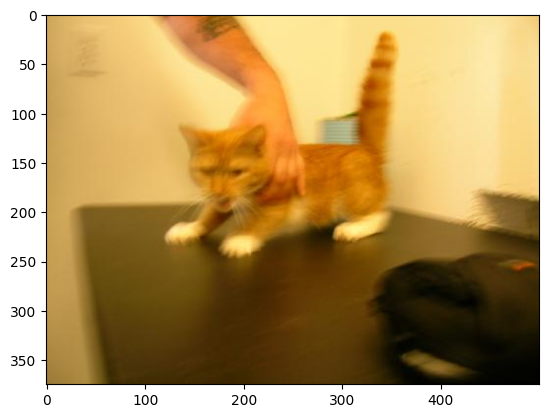

In [6]:
import matplotlib.pyplot as plt

img = load_img(r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\train\cats\0.jpg')

plt.imshow(img)
img_to_array(img).shape

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), # image shape then rgb
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # probability classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs=10, validation_data=validation)

C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 779ms/step - accuracy: 0.5005 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 753ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 794ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 777ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 811ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 732ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 722ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 727ms/step

In [ ]:
from tensorflow.keras.applications import VGG16 # importing VGG16 pre-trained model

preModel = VGG16(weights='imagenet', input_shape=(200, 200, 3), include_top=False) # weights -> https://www.image-net.org/, the dataset VGG16 is trained off of
preModel.layers

[<InputLayer name=input_layer_7, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
for layer in preModel.layers:
    layer.trainable = False # freezing the layer

In [ ]:
preModelLayers = preModel.output
preModelLayers = Flatten()(preModelLayers)
preModelLayers = Dense(64, activation='relu')(preModelLayers)
prediction = Dense(1, activation='sigmoid')(preModelLayers)

In [ ]:
from tensorflow.keras.models import Model

preModel = Model(inputs=preModel.input, outputs=prediction)

preModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
preModel.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8070 - loss: 0.4170 - val_accuracy: 0.9070 - val_loss: 0.2340
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.8840 - loss: 0.2634 - val_accuracy: 0.9040 - val_loss: 0.2114
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9040 - loss: 0.2259 - val_accuracy: 0.9130 - val_loss: 0.2096
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1201s 19s/step - accuracy: 0.9115 - loss: 0.2163 - val_accuracy: 0.9080 - val_loss: 0.2226
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9200 - loss: 0.1976 - val_accuracy: 0.9140 - val_loss: 0.2017
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9315 - loss: 0.1780 - val_accuracy: 0.9220 - val_loss: 0.2039
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9315 - loss: 0.1682 - val_accuracy: 0.9230 - val_loss: 0.1970
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.9305 - loss: 0.1680 - val_accuracy: 0.9190 -

In [ ]:
basicPrediction = model.predict(test)
prePrediction = preModel.predict(test)

NameError: name 'model' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.]]


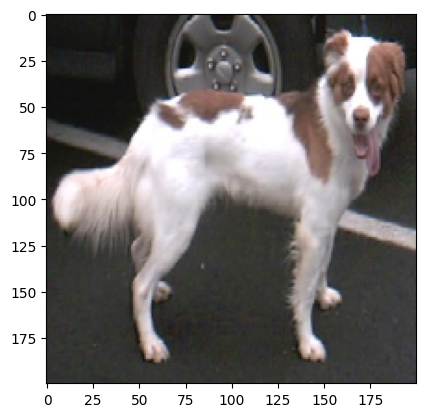

In [ ]:
import numpy as np

img = load_img(r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\test\dogs\1500.jpg', target_size=(200, 200))
plt.imshow(img)
img = img_to_array(img)
img /= 255
img = np.expand_dims(img, axis=0) # expand dimensions
prediction = model.predict(img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


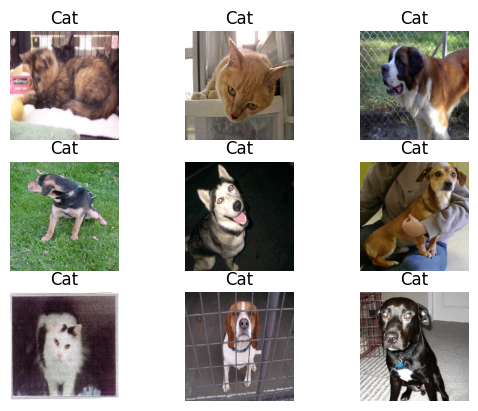

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [64]:
valueArray, labelArray = next(validation)
prediction = model.predict(valueArray)

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(valueArray[i])
    plt.axis('off')
    if prediction[i] == 0:
        plt.title('Cat')
    else:
        plt.title('Dog')
    
plt.show()

prediction